In [89]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [90]:
def max_pooling(in_arr):
    return np.max(in_arr)

In [91]:
def avg_pooling(in_arr):
    return np.average(in_arr)

In [92]:
def roi_pooling(in_img_arr, out_size, core_pooling):
    """
    RoI pooling
    Parameters
    ----------
    in_img_arr : np.array with shape (height, width, channel)
        An input image array
    out_size : int
        Output image size with height = width = out_size
    core_pooling : function
        The inner pooling function of each pixel region, returning one value
    Returns
    ----------
    out_img_arr :np.array with shape (out_size, out_size, channel)
        Output image array
    """
    in_h = in_img_arr.shape[0]
    in_w = in_img_arr.shape[1]
    in_c = in_img_arr.shape[2]

    h_offset = in_h // out_size
    h_offset_last = h_offset + (in_h % out_size)
    w_offset = in_w // out_size
    w_offset_last = w_offset + (in_w % out_size)

    out_img_arr = np.empty((out_size, out_size, in_c))

    for out_c in range(0, in_c):
        for out_h in range(0, out_size):
            for out_w in range(0, out_size):
                out_img_arr[out_h, out_w, out_c] = core_pooling(
                    in_img_arr[
                                out_h * h_offset:(out_h * h_offset) + h_offset_last if (out_h == out_size - 1) else (out_h + 1) * h_offset,
                                out_w * w_offset:(out_w * w_offset) + w_offset_last if (out_w == out_size - 1) else (out_w + 1) * w_offset,
                                out_c
                            ]
                )

    return np.round(out_img_arr).astype(np.int)


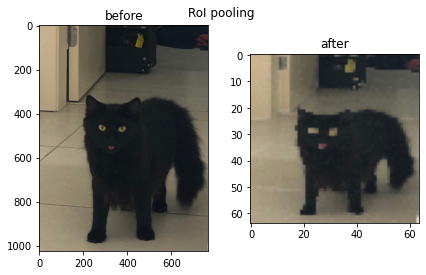

In [98]:
IMG_FILE_PATH = './cat.jpg'
ROI_SIZE = 64

with Image.open(IMG_FILE_PATH) as im:
    ori_img = np.array(im)

roi_img = roi_pooling(ori_img, ROI_SIZE, max_pooling)

fig, axes = plt.subplots(1, 2)
fig.tight_layout()
fig.suptitle('RoI pooling')

axes[0].set_title('before')
axes[0].imshow(ori_img)
axes[1].set_title('after')
axes[1].imshow(roi_img)